### Clustering
* Grouping samilar information together like => samilar house 

In [2]:
import pandas as pd

In [3]:
house_data = pd.read_csv('../../2-Data-Manipulation/Pandas/house_rental_data.csv', index_col='Unnamed: 0')

In [6]:
house_data.sample(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
549,1245.300,5,6,3,2,2,40000
127,1206.162,7,7,2,2,1,57000
492,1647.354,10,14,2,2,2,55000
66,426.960,5,13,1,1,1,23000
350,772.086,6,7,2,2,1,39000
142,3323.172,19,21,5,3,4,140000
595,1551.288,5,5,4,2,2,59800
593,1832.370,9,16,4,2,2,69000
102,2366.070,2,7,3,2,2,75000
369,537.258,22,26,1,0,1,19000


In [8]:
from sklearn.cluster import KMeans

In [9]:
cluster_algo = KMeans(n_clusters=4)

In [10]:
cluster_algo.fit(house_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
labels = cluster_algo.predict(house_data)

In [24]:
house_data[labels == 2].sample(3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
434,1352.040,17,24,3,2,2,85000
474,1889.298,2,14,4,2,2,105000
253,1579.752,4,15,3,1,2,99990


### Exercise
1. Find 3 categories of people in the company for HR_data
2. Steps
   - Transform all the categorical data to num
   - Use KMeans to find similar people

In [18]:
hr_data = pd.read_csv('../../2-Data-Manipulation/Pandas/HR_comma_sep.csv')

In [25]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

In [26]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
from sklearn.preprocessing import LabelEncoder

* new empty object to transform categorical data to numerical data

In [27]:
le_dept = LabelEncoder()     
le_salary = LabelEncoder()

In [29]:
le_dept.fit(hr_data.dept)

LabelEncoder()

In [28]:
le_salary.fit(hr_data.salary)

LabelEncoder()

In [32]:
hr_data['dept_en'] = le_dept.transform(hr_data.dept)
hr_data['salary_en'] = le_salary.transform(hr_data.salary) 

* fit_transform() in one Go

In [33]:
hr_data['dept_en'] = le_dept.fit_transform(hr_data.dept)
hr_data['salary_en'] = le_salary.fit_transform(hr_data.salary) 

* create KMeans models
* train models
* find groups

In [37]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,dept_en,salary_en
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,1


In [34]:
hr_kmeans = KMeans(n_clusters=4)

In [39]:
hr_data_subset = hr_data[['dept_en','salary_en']]

In [40]:
hr_kmeans.fit(hr_data_subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
labels = hr_kmeans.predict(hr_data_subset)

In [46]:
hr_data[labels == 3]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,dept_en,salary_en
31,0.45,0.57,2,134,3,0,1,0,hr,low,3,1
32,0.40,0.51,2,145,3,0,1,0,hr,low,3,1
33,0.45,0.55,2,140,3,0,1,0,hr,low,3,1
34,0.84,0.87,4,246,6,0,1,0,hr,low,3,1
60,0.85,0.91,5,226,5,0,1,0,management,medium,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
14952,0.44,0.52,2,149,3,0,1,0,marketing,low,5,1
14975,0.10,0.79,7,310,4,0,1,0,hr,medium,3,2
14976,0.40,0.47,2,136,3,0,1,0,hr,medium,3,2
14977,0.81,0.85,4,251,6,0,1,0,hr,medium,3,2


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

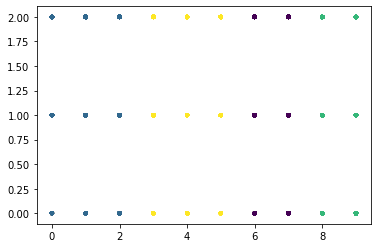

In [49]:
plt.scatter(x=hr_data_subset.dept_en,y=hr_data_subset.salary_en, s=10, c=labels)